In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib.ticker as mtick
import seaborn as sns 
from sklearn.preprocessing import MinMaxScaler  
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix , classification_report



In [ ]:
dataframe=pd.read_csv("Telco-Customer-Churn.csv")
print(dataframe[:5]) #printing the first 5 terms
dataframe.shape # To know the no of rows and columns 

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

(7043, 21)

In [ ]:
dataframe.isna().sum() #To know the number of null values  

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
df=dataframe.drop(columns=['customerID'])
df2 = df[df.duplicated()]
print(df2)


      gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
964     Male              0      No         No       1          Yes   
1338    Male              0      No         No       1          Yes   
1491  Female              0      No         No       1          Yes   
1739    Male              0      No         No       1          Yes   
1932    Male              0      No         No       1          Yes   
2713    Male              0      No         No       1          Yes   
2892    Male              0      No         No       1          Yes   
3301  Female              1      No         No       1          Yes   
3754    Male              0      No         No       1          Yes   
4098    Male              0      No         No       1          Yes   
4476  Female              0      No         No       1          Yes   
5506    Male              0      No         No       1          Yes   
5736    Male              0      No         No       1          Yes   
5759  

In [ ]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)

In [ ]:
df.shape


(7021, 20)

In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7021.000000,7021.000000,7021.000000
mean,0.162512,32.469449,64.851894
std,0.368947,24.534965,30.069001
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.750000
50%,0.000000,29.000000,70.400000
75%,0.000000,55.000000,89.900000
max,1.000000,72.000000,118.750000


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7021 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7021 non-null   object 
 1   SeniorCitizen     7021 non-null   int64  
 2   Partner           7021 non-null   object 
 3   Dependents        7021 non-null   object 
 4   tenure            7021 non-null   int64  
 5   PhoneService      7021 non-null   object 
 6   MultipleLines     7021 non-null   object 
 7   InternetService   7021 non-null   object 
 8   OnlineSecurity    7021 non-null   object 
 9   OnlineBackup      7021 non-null   object 
 10  DeviceProtection  7021 non-null   object 
 11  TechSupport       7021 non-null   object 
 12  StreamingTV       7021 non-null   object 
 13  StreamingMovies   7021 non-null   object 
 14  Contract          7021 non-null   object 
 15  PaperlessBilling  7021 non-null   object 
 16  PaymentMethod     7021 non-null   object 


In [ ]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [ ]:
df=df.drop(df.index[(df["TotalCharges"] == " ")],axis=0)
df['TotalCharges']=df.TotalCharges.astype(float)
df['TotalCharges'].dtype

dtype('float64')

In [ ]:
#For printing all unique values in each columns of the the dataset
for col in df.columns:
    if (df[col].dtypes=='object'):
        print (f"{col}:{df[col].unique()}")

gender:['Female' 'Male']
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
PhoneService:['No' 'Yes']
MultipleLines:['No phone service' 'No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes' 'No internet service']
OnlineBackup:['Yes' 'No' 'No internet service']
DeviceProtection:['No' 'Yes' 'No internet service']
TechSupport:['No' 'Yes' 'No internet service']
StreamingTV:['No' 'Yes' 'No internet service']
StreamingMovies:['No' 'Yes' 'No internet service']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn:['No' 'Yes']


In [ ]:
df.replace({'No internet service':'No'},inplace=True)
df.replace({'No phone service':'No'},inplace=True) 
# df.replace({'0':'No'},inplace=True)
# df.replace({'1':'Yes'},inplace=True)

In [ ]:
#For printing all unique values in each columns of the the dataset
for col in df.columns:  
    if (df[col].dtypes=='object'):
        print (f"{col}:{df[col].unique()}")

gender:['Female' 'Male']
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
PhoneService:['No' 'Yes']
MultipleLines:['No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes']
OnlineBackup:['Yes' 'No']
DeviceProtection:['No' 'Yes']
TechSupport:['No' 'Yes']
StreamingTV:['No' 'Yes']
StreamingMovies:['No' 'Yes']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn:['No' 'Yes']


In [ ]:
#For printing all unique values in each columns of the the dataset
for col in df.columns:
    if (df[col].dtypes=='object'):
        print (f"{col}:{df[col].unique()}")

gender:['Female' 'Male']
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
PhoneService:['No' 'Yes']
MultipleLines:['No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes']
OnlineBackup:['Yes' 'No']
DeviceProtection:['No' 'Yes']
TechSupport:['No' 'Yes']
StreamingTV:['No' 'Yes']
StreamingMovies:['No' 'Yes']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn:['No' 'Yes']


In [ ]:
#Making a list of all attributes
cat=[i  for i  in df.columns if len(df[i].unique())< 4]
cat

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'Churn']

In [ ]:
#making a list of all the attribute without churn attribute
lis=[]
for i in df.columns:
    if i !='Churn':
        lis.append(i)

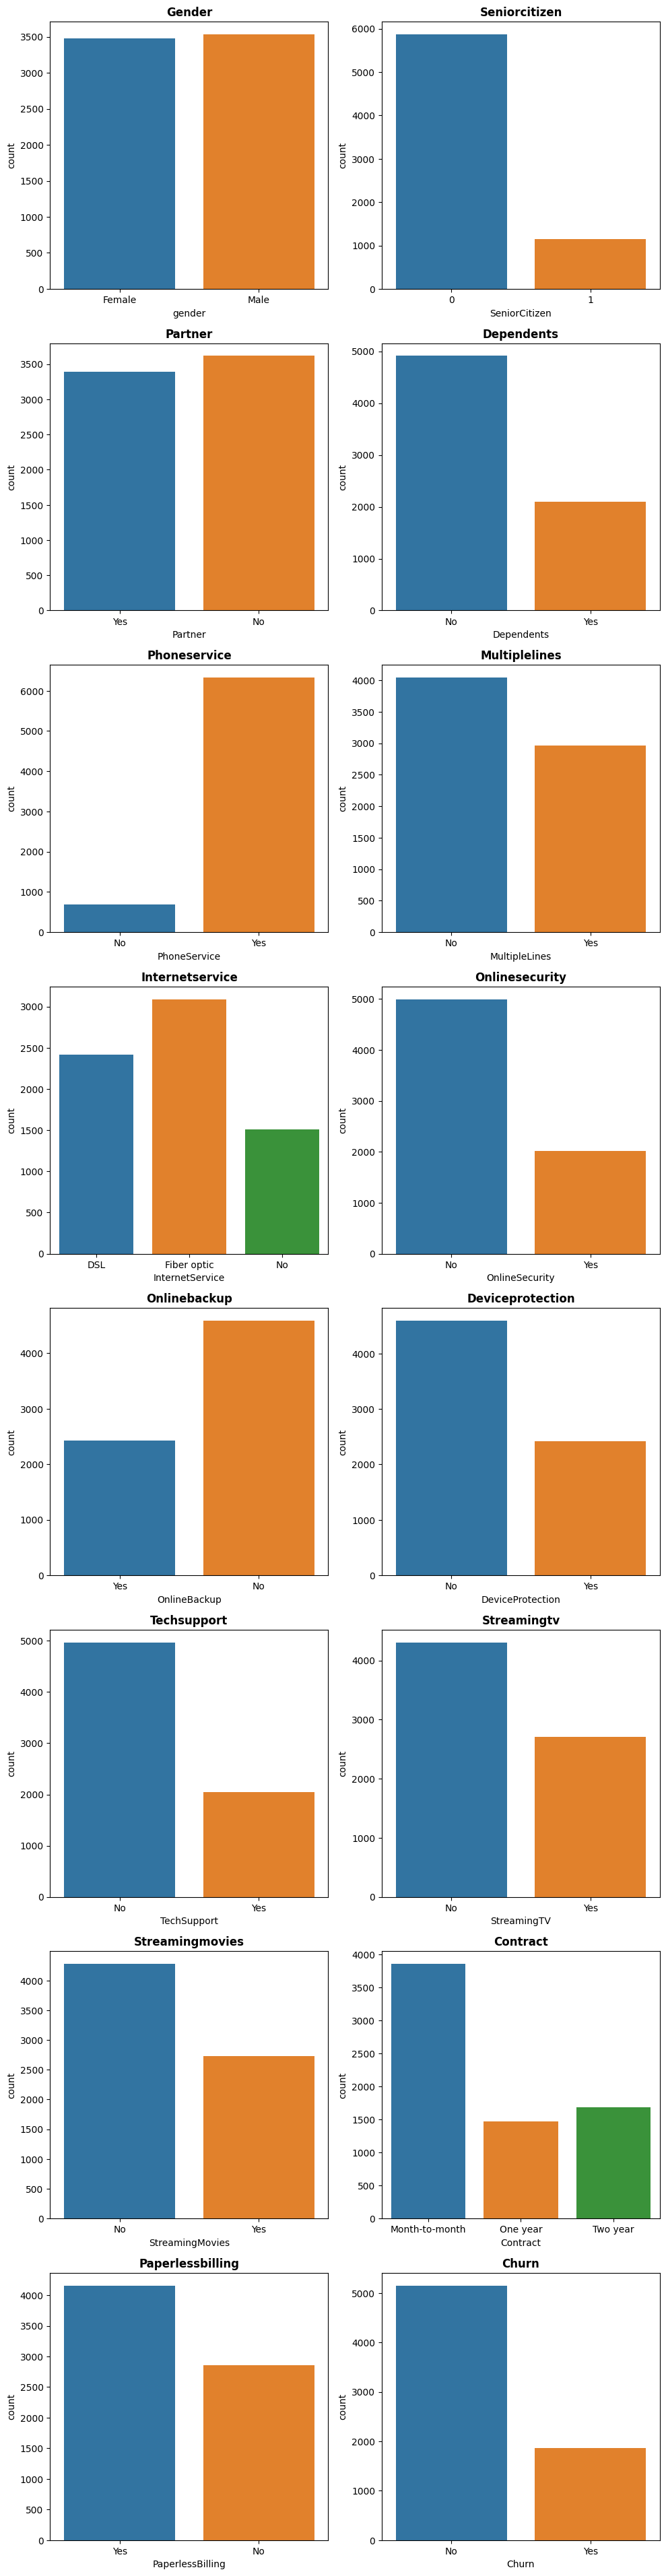

In [ ]:
plt.figure(figsize=(10,100))
for n,column in enumerate(cat):
    plot=plt.subplot(21,2,n+1)
    sns.countplot(x=df[column],data=df,hue=None,saturation=0.75)
    plt.title(f'{column.title()}',weight='bold')
    plt.tight_layout()
plt.show()

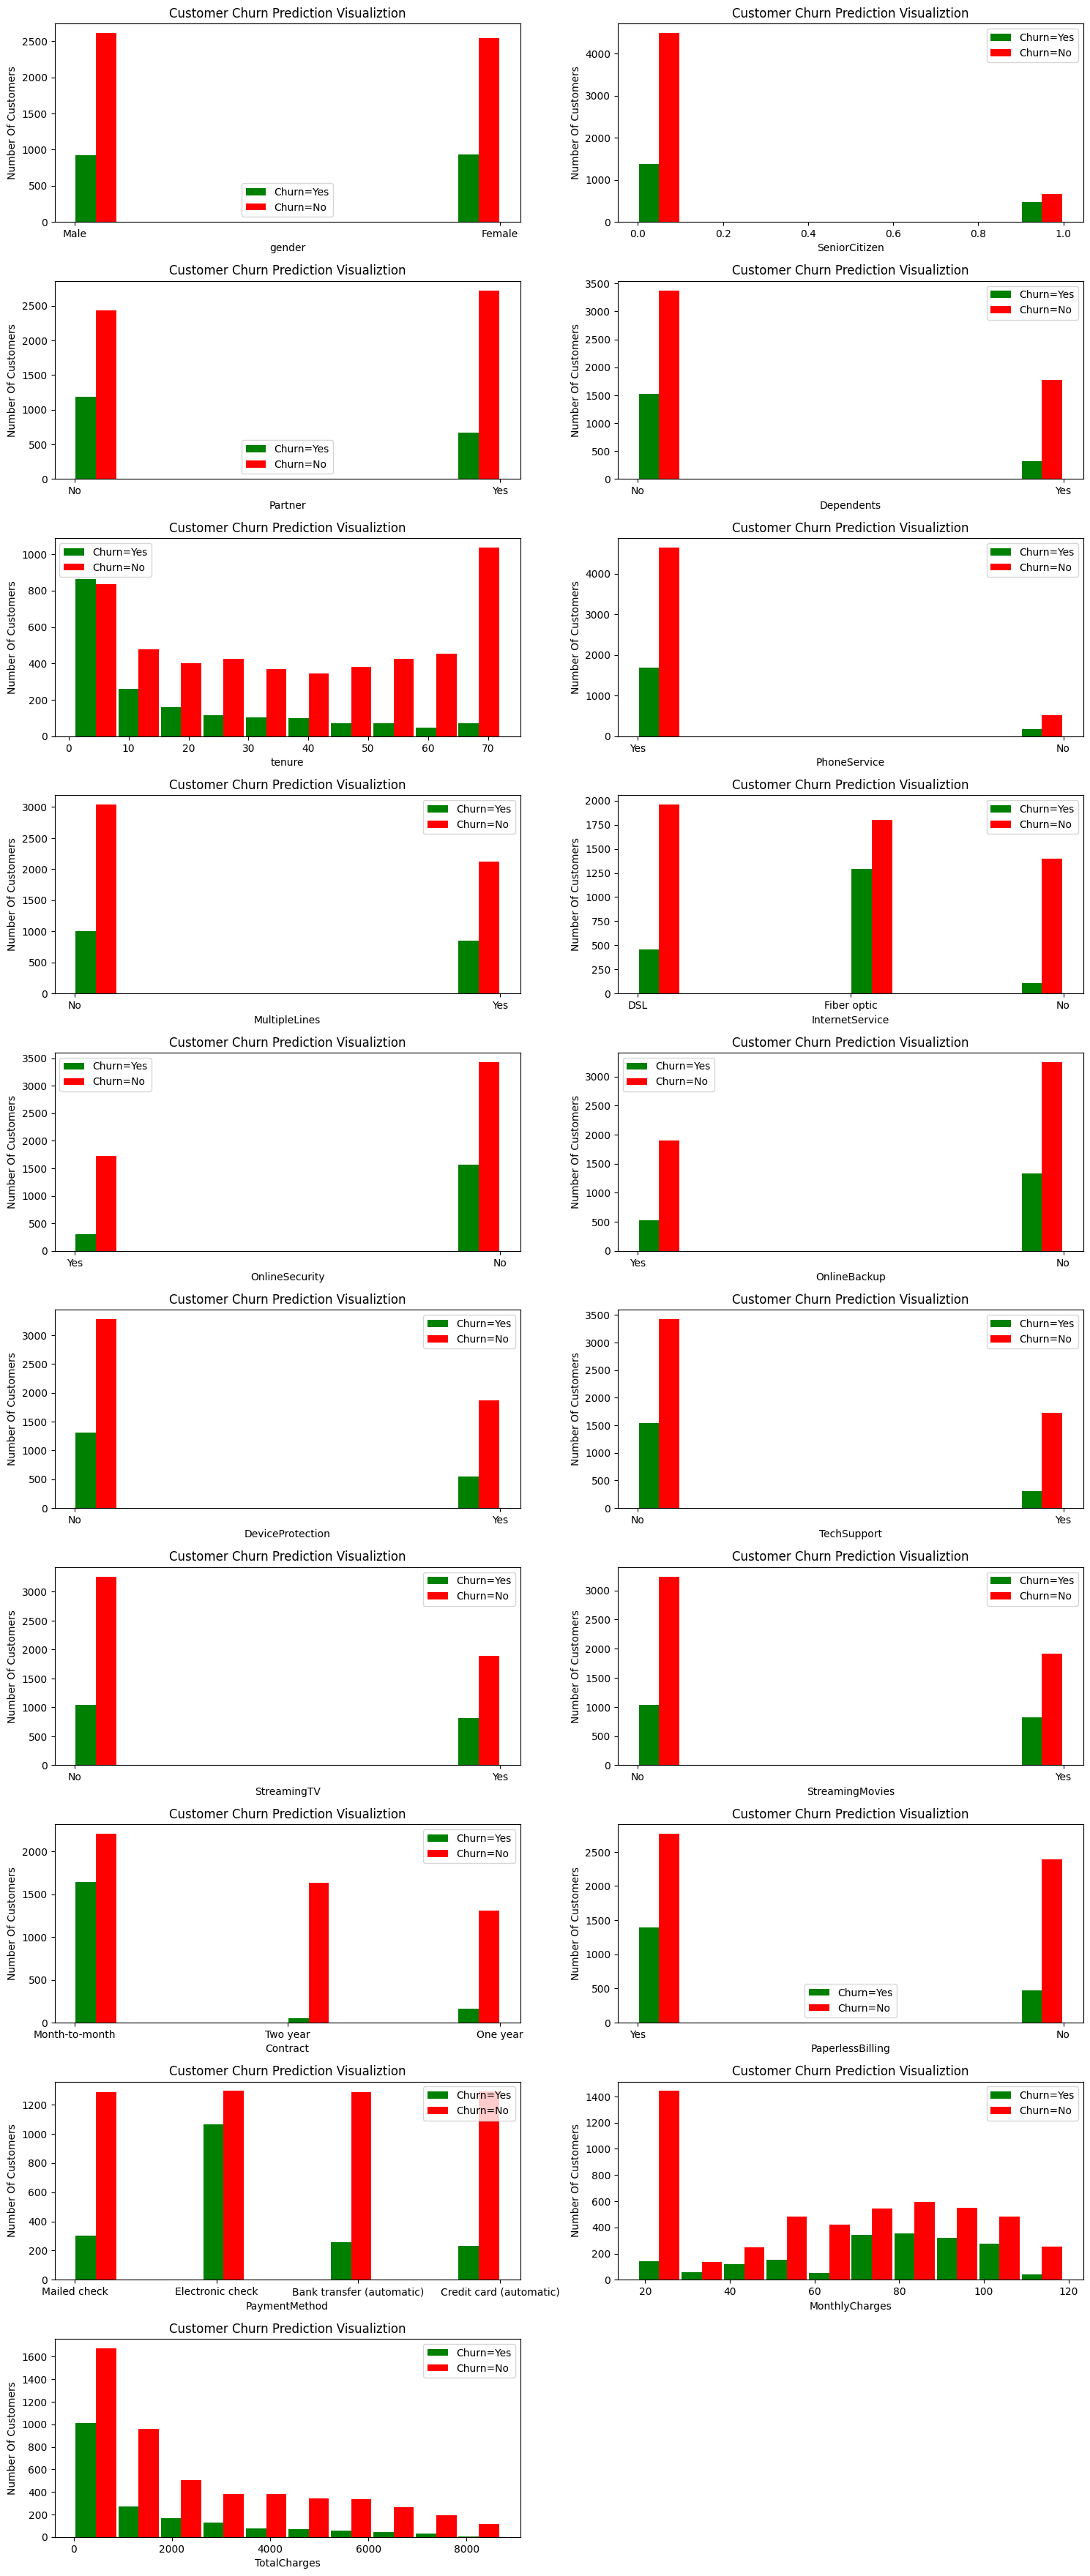

In [ ]:
#lets check the relation of each attribute with the churn
plt.figure(figsize=(15,70))
for n,column in enumerate(lis):
    plot=plt.subplot(20,2,n+1)
    mc_churn_no = df[df.Churn=='No'][column]   
    mc_churn_yes = df[df.Churn=='Yes'][column]

    plt.xlabel(column)
    plt.ylabel("Number Of Customers")
    plt.title("Customer Churn Prediction Visualiztion")
    plt.hist([mc_churn_yes, mc_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
    plt.tight_layout()
    plt.legend()
plt.show()

<ipython-input-200-e4123a228d41>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df[df['Contract']=='Month-to-month']['tenure'],
<ipython-input-200-e4123a228d41>:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df[df['Contract']=='One year']['tenure'],
<ipython-input-200-e4123a228d41

Text(0.5, 1.0, 'Two Year Contract')

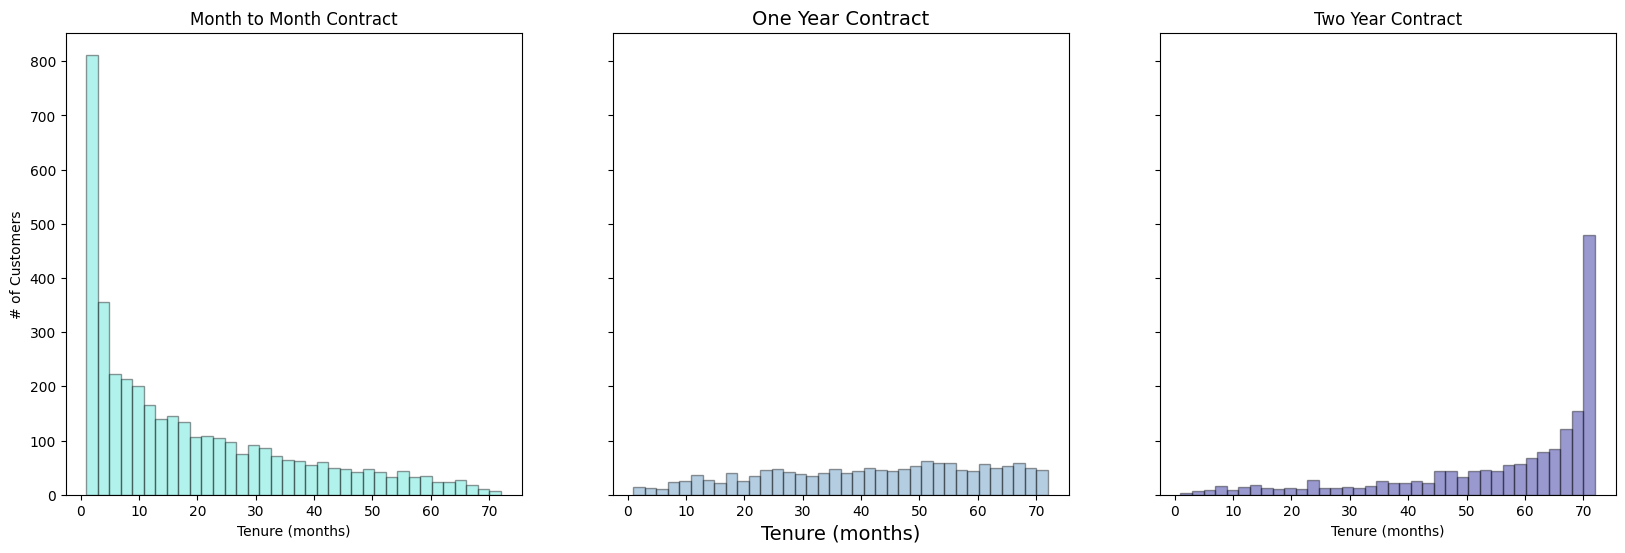

In [ ]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, sharey = True, figsize = (20,6))

ax = sns.distplot(df[df['Contract']=='Month-to-month']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'turquoise',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax1)
ax.set_ylabel('# of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('Month to Month Contract')
ax = sns.distplot(df[df['Contract']=='One year']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'steelblue',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax2)
ax.set_xlabel('Tenure (months)',size = 14)
ax.set_title('One Year Contract',size = 14)

ax = sns.distplot(df[df['Contract']=='Two year']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'darkblue',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax3)

ax.set_xlabel('Tenure (months)')
ax.set_title('Two Year Contract')

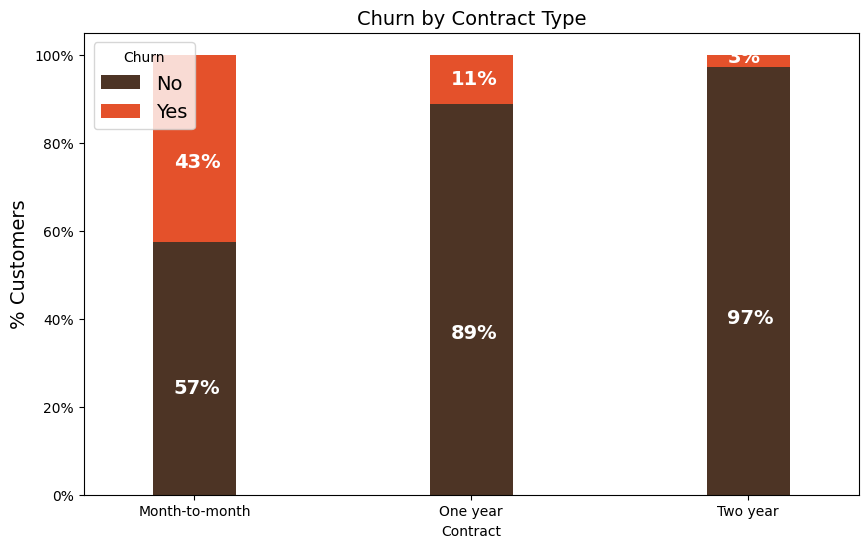

In [ ]:
colors = ['#4D3425','#E4512B']
contract_churn = df.groupby(['Contract','Churn']).size().unstack()

ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.3,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (10,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers',size = 14)
ax.set_title('Churn by Contract Type',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)

In [ ]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
    df[col].replace({'Yes': 1,'No': 0},inplace=True)
df['gender'].replace({'Female':1,'Male':0},inplace=True)

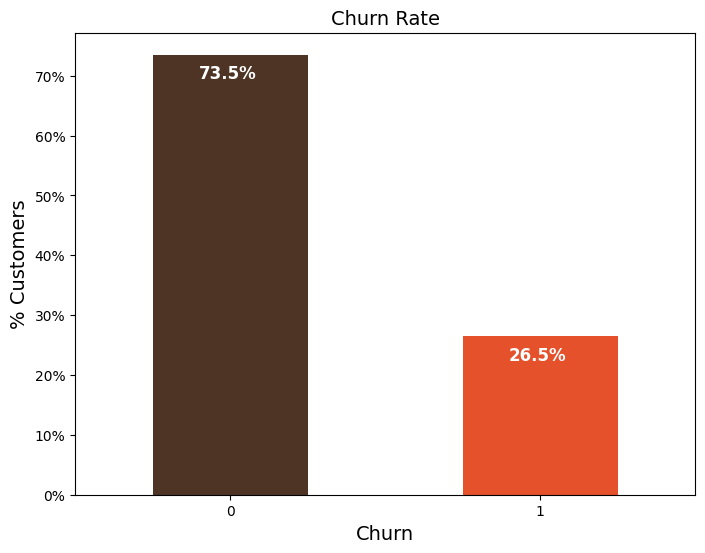

In [ ]:
colors = ['#4D3425','#E4512B']
value=1
ax = (df['Churn'].value_counts()*100.0 /len(df)).plot(kind='bar',
                                                                           stacked = True,
                                                                          rot = 0,
                                                                          color = colors,
                                                                         figsize = (8,6))
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers',size = 14)
ax.set_xlabel('Churn',size = 14)
ax.set_title('Churn Rate', size = 14)

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-4.0, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold')
          #  size = 14)


<ipython-input-204-c585b9a46f8b>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(df.TotalCharges[(df["Churn"] == 0) ],
<ipython-input-204-c585b9a46f8b>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(df.TotalCharges[(df["Churn"] == 1) ],


Text(0.5, 1.0, 'Distribution of total charges by churn')

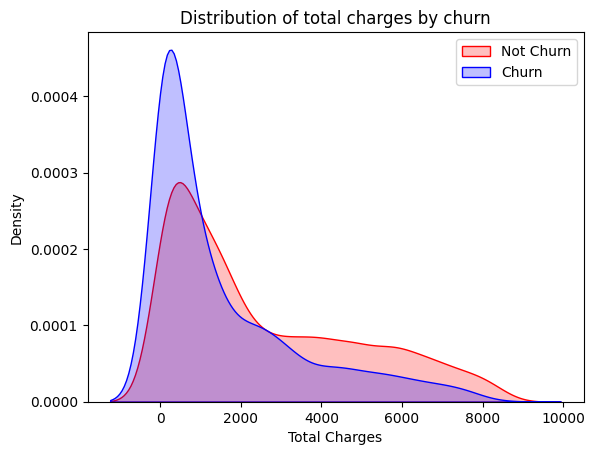

In [ ]:
ax = sns.kdeplot(df.TotalCharges[(df["Churn"] == 0) ],
                color="Red",shade =True)
ax = sns.kdeplot(df.TotalCharges[(df["Churn"] == 1) ],
                ax =ax, color="Blue",shade =True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Total Charges')
ax.set_title('Distribution of total charges by churn')

<ipython-input-205-35f896ea2873>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor=df.corr()


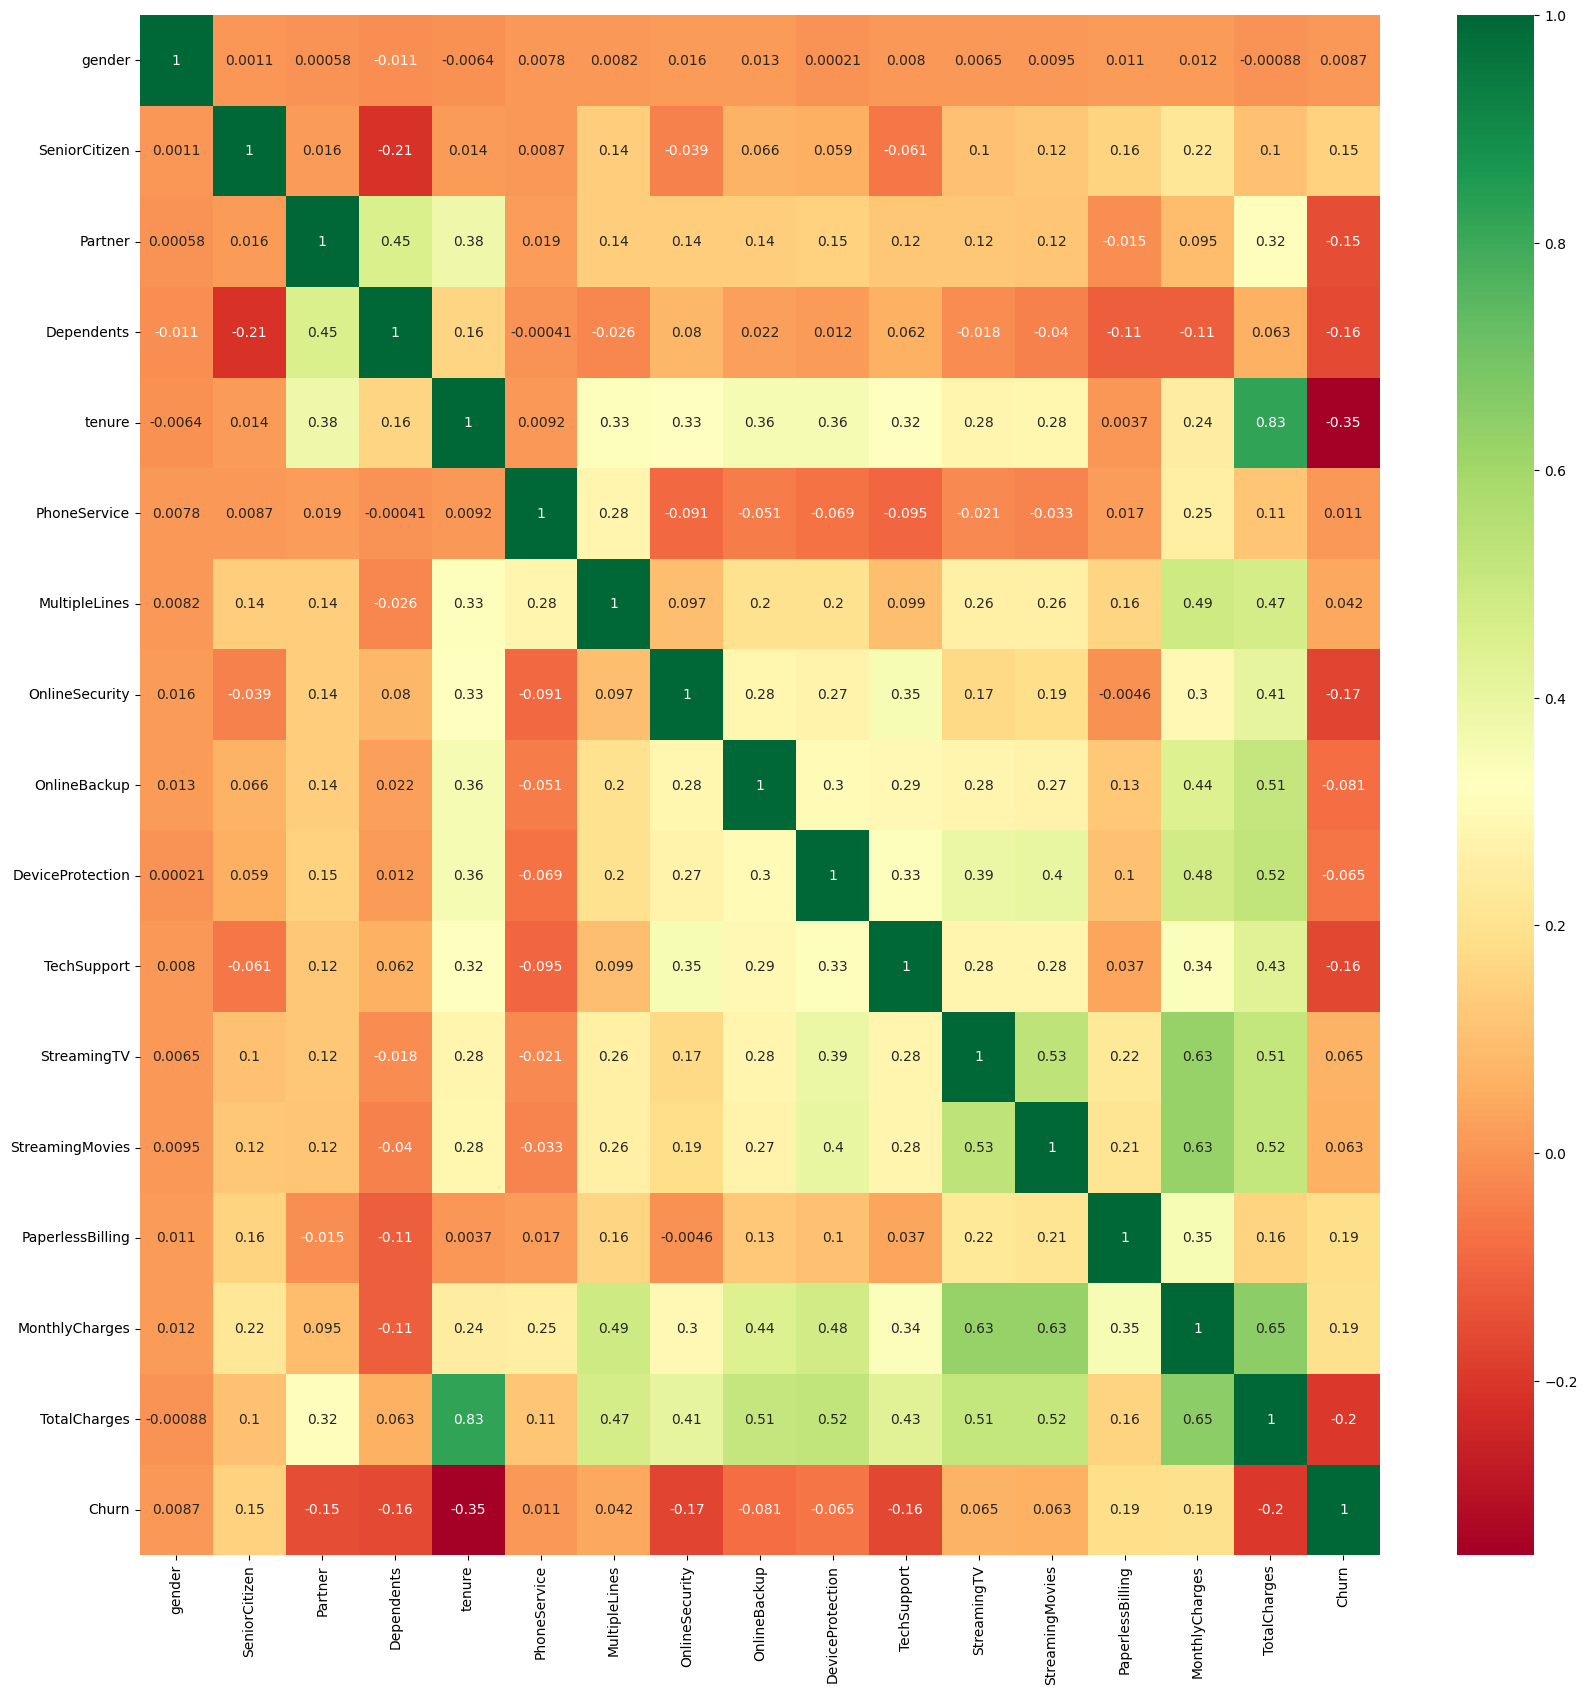

In [ ]:
cor=df.corr()
feature=cor.index
plt.figure(figsize=(20,20))
g=sns.heatmap(df[feature].corr(),annot=True,cmap="RdYlGn")

In [ ]:
#Removing missing values 
df.dropna(inplace = True)
#Remove customer IDs from the data set
df2 = df.iloc[:,1:]
#Convertin the predictor variable in a binary numeric variable
df2['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df2['Churn'].replace(to_replace='No',  value=0, inplace=True)

#Let's convert all the categorical variables into dummy variables
df_dummies = pd.get_dummies(df2)
df_dummies.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,0,0,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,34,1,0,1,0,1,0,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,2,1,0,1,1,0,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,45,0,0,1,0,1,1,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,2,1,0,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [ ]:
y = df_dummies['Churn'].values
X = df_dummies.drop(columns=['Churn'])
scaler = MinMaxScaler(feature_range=(0, 1))
X_scaled = scaler.fit_transform(X)
X = pd.DataFrame(X_scaled, columns=X.columns)

In [ ]:
y = df_dummies['Churn'].values
X = df_dummies.drop(columns = ['Churn'])

# Scaling all the variables to a range of 0 to 1
from sklearn.preprocessing import MinMaxScaler
features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features

In [ ]:
# Create Train & Test Data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101 )

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15, random_state=1) # 0.15 x 0.8 = 0.

In [ ]:
# Running logistic regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result = model.fit(X_train, y_train) 

In [ ]:
from sklearn import metrics
pt=model.predict(X_train) 
prediction_test = model.predict(X_test)
# Print the prediction accuracy
print ("Train set accuracy =>",metrics.accuracy_score(y_train,pt)) 
print ("Test set accuracy =>",metrics.accuracy_score(y_test, prediction_test)) 

Train set accuracy => 0.7988587731811697
Test set accuracy => 0.8288159771754636


In [ ]:
print(classification_report(y_test,prediction_test))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89      1043
           1       0.70      0.57      0.63       359

    accuracy                           0.83      1402
   macro avg       0.78      0.74      0.76      1402
weighted avg       0.82      0.83      0.82      1402



In [ ]:
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1) 
model_rf = RandomForestClassifier(n_estimators=1000 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30)
model_rf.fit(X_train, y_train)

# Make predictions
pt = model_rf.predict(X_train)
prediction_test = model_rf.predict(X_test)
print ("Train set accuracy =>",metrics.accuracy_score(y_train,pt)) 
print ("Test set accuracy =>",metrics.accuracy_score(y_test, prediction_test)) 

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Train set accuracy => 0.8134807417974322
Test set accuracy => 0.8273894436519258


In [ ]:
print(classification_report(y_test,prediction_test))

              precision    recall  f1-score   support

           0       0.85      0.94      0.89      1043
           1       0.74      0.50      0.60       359

    accuracy                           0.83      1402
   macro avg       0.79      0.72      0.74      1402
weighted avg       0.82      0.83      0.82      1402



In [ ]:
#lets encode the yes as 1 and 0 no as 0
#convert female into 1 and male into 0
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
    df[col].replace({'Yes': 1,'No': 0},inplace=True)
df['gender'].replace({'Female':1,'Male':0},inplace=True)

In [ ]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,0,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,0,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,0,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,1,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,24,1,1,DSL,1,0,1,1,1,1,One year,1,Mailed check,84.80,1990.50,0
7039,1,0,1,1,72,1,1,Fiber optic,0,1,1,0,1,1,One year,1,Credit card (automatic),103.20,7362.90,0
7040,1,0,1,1,11,0,0,DSL,1,0,0,0,0,0,Month-to-month,1,Electronic check,29.60,346.45,0
7041,0,1,1,0,4,1,1,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Mailed check,74.40,306.60,1


In [ ]:
dummy_var=["InternetService","Contract","PaymentMethod"]
df=pd.get_dummies(data=df,columns=dummy_var)

In [ ]:
#One hot encoding for categorical columns
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']
scaler = MinMaxScaler()
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,0.000000,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,0.464789,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0.014085,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,0.619718,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,0.014085,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,0.323944,1,1,1,0,1,...,1,0,0,0,1,0,0,0,0,1
7039,1,0,1,1,1.000000,1,1,0,1,1,...,0,1,0,0,1,0,0,1,0,0
7040,1,0,1,1,0.140845,0,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
7041,0,1,1,0,0.042254,1,1,0,0,0,...,0,1,0,1,0,0,0,0,0,1


In [ ]:


x=df.drop(["Churn"],axis=1)
y=df["Churn"]



In [ ]:


xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=1)
# xtrain = xtrain.astype('float32')
# ytrain = ytrain.astype('float32')



In [ ]:
#importing tensor flow for ANN
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(20, input_shape=(26,), activation='relu'),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])



In [ ]:
model.fit(xtrain, ytrain, epochs=100)

Epoch 1/100
176/176 [==============================] - 2s 3ms/step - loss: 0.5233 - accuracy: 0.7274
Epoch 2/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4337 - accuracy: 0.7873
Epoch 3/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4260 - accuracy: 0.7930
Epoch 4/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4216 - accuracy: 0.7992
Epoch 5/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4190 - accuracy: 0.8015
Epoch 6/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4176 - accuracy: 0.8026
Epoch 7/100
176/176 [==============================] - 1s 5ms/step - loss: 0.4156 - accuracy: 0.8051
Epoch 8/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4136 - accuracy: 0.8080
Epoch 9/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4123 - accuracy: 0.8065
Epoch 10/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4114 - accura

In [ ]:
model.evaluate(xtest,ytest)

44/44 [==============================] - 0s 2ms/step - loss: 0.4336 - accuracy: 0.7896


[0.4336307942867279, 0.7895863056182861]

In [ ]:
yp = model.predict(xtest)
yt = model.predict(xtrain)

176/176 [==============================] - 0s 1ms/step


In [ ]:
ypred=[]
ytpred=[]
for i in yp:
    if i>=0.5:
        ypred.append(1)
    else:
        ypred.append(0)
for i in yt:
    if i>=0.5:
        ytpred.append(1)
    else:
        ytpred.append(0)


In [ ]:
print ("Train set accuracy =>",metrics.accuracy_score(ytrain,ytpred)) 
print ("Test set accuracy =>",metrics.accuracy_score(ytest,ypred)) 

Train set accuracy => 0.829885877318117
Test set accuracy => 0.7895863052781741


In [ ]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1047
           1       0.60      0.52      0.55       355

    accuracy                           0.79      1402
   macro avg       0.72      0.70      0.71      1402
weighted avg       0.78      0.79      0.78      1402



In [ ]:
model = keras.Sequential([
    keras.layers.Dense(20, input_shape=(26,), activation='linear'),
    keras.layers.Dense(10, activation='linear'),
    keras.layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [ ]:
model.fit(xtrain, ytrain, epochs=100)

Epoch 1/100
176/176 [==============================] - 2s 3ms/step - loss: 0.4680 - accuracy: 0.7712
Epoch 2/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4277 - accuracy: 0.7932
Epoch 3/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4249 - accuracy: 0.8006
Epoch 4/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4232 - accuracy: 0.7990
Epoch 5/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4223 - accuracy: 0.8019
Epoch 6/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4223 - accuracy: 0.8026
Epoch 7/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4231 - accuracy: 0.8024
Epoch 8/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4224 - accuracy: 0.8001
Epoch 9/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4220 - accuracy: 0.8040
Epoch 10/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4224 - accura

In [ ]:
model.evaluate(xtest,ytest)

In [ ]:
yp = model.predict(xtest)
yt = model.predict(xtrain)

In [ ]:
ypred=[]
ytpred=[]
for i in yp:
    if i>=0.5:
        ypred.append(1)
    else:
        ypred.append(0)
for i in yt:
    if i>=0.5:
        ytpred.append(1)
    else:
        ytpred.append(0)


In [ ]:
print ("Train set accuracy =>",metrics.accuracy_score(ytrain,ytpred)) 
print ("Test set accuracy =>",metrics.accuracy_score(ytest,ypred)) 

In [ ]:
print(classification_report(ytest,ypred))